Linear regression

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
with open('./ex1data1.txt', 'r') as file:
    data = file.read().splitlines()
    
X = []
y = []
for line in data:
    (c1, c2) = line.split(',')
    X.append(float(c1))
    y.append(float(c2))

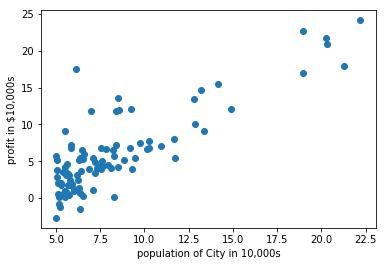

In [4]:
plt.scatter(X, y)
plt.xlabel('population of City in 10,000s')
plt.ylabel('profit in $10,000s')
plt.show()

In [5]:
X_ = np.ones((len(X), 2))
X_[:, 1] = X
X = X_
y = np.array(y)
y = y.reshape((len(y), 1))

In [15]:
theta = np.zeros((2, 1))

iterations = 1500
alpha = 0.01
m = len(X)

for i in range(iterations):
    diff = np.squeeze(X.dot(theta) - y)
    squared_errors = np.sum(diff ** 2)
    loss = squared_errors / (2.0 * m)
    print('Loss at {} = {:.5f}.'.format(i, loss))
    
    d_dtheta_0 = np.mean(np.multiply(diff, X[:, 0]))
    theta[0, 0] = theta[0, 0] - alpha * d_dtheta_0
    
    d_dtheta_1 = np.mean(np.multiply(diff, X[:, 1]))
    theta[1, 0] = theta[1, 0] - alpha * d_dtheta_1

ValueError: shapes (47,3) and (2,1) not aligned: 3 (dim 1) != 2 (dim 0)

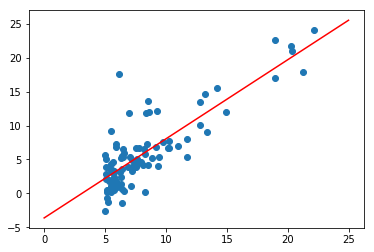

In [7]:
plt.scatter(X[:, 1].tolist(), y.tolist())

x_coords = [0, 25]
line_xs = np.array([[1, x_coords[0]], [1, x_coords[1]]])
line_ys = line_xs.dot(theta).squeeze().tolist()

plt.plot(x_coords, line_ys, color='r', linestyle='-')

Multivariate linear regression

In [8]:
with open('./ex1data2.txt', 'r') as file:
    data = file.read().splitlines()
    
X = []
y = []
for line in data:
    (c1, c2, c3) = line.split(',')
    X.append([float(c1), float(c2)])
    y.append(float(c3))

X = np.asarray(X)
y = np.array(y).reshape((len(y), 1))

In [9]:
# feature normalization: subtract mean and divide by standard deviation
means = np.mean(X, axis=0)
stds = np.std(X, axis=0)
for j in range(X.shape[1]):
    v = X[:, j]
    X[:, j] = (v - means[j]) / stds[j]
    
X = np.hstack([np.ones((len(X), 1)), X])

In [18]:
n_features = X.shape[1]
theta = np.zeros((n_features, 1))

iterations = 1500
alpha = 0.01
m = len(X)

for i in range(iterations):
    diff = np.squeeze(X.dot(theta) - y)
    loss = np.sum(diff ** 2) / (2.0 * m)
    print('Loss at {} = {:.5f}.'.format(i, loss))
    
    for j in range(n_features):
        d_dtheta_j = np.mean(np.multiply(diff, X[:, j]))
        theta[j, 0] = theta[j, 0] - alpha * d_dtheta_j

Loss at 0 = 65591548106.45744.
Loss at 1 = 64297776251.62011.
Loss at 2 = 63031018305.52132.
Loss at 3 = 61790694237.53249.
Loss at 4 = 60576236901.99104.
Loss at 5 = 59387091739.98860.
Loss at 6 = 58222716488.38939.
Loss at 7 = 57082580895.89540.
Loss at 8 = 55966166445.97885.
Loss at 9 = 54872966086.50778.
Loss at 10 = 53802483965.89506.
Loss at 11 = 52754235175.60545.
Loss at 12 = 51727745498.85994.
Loss at 13 = 50722551165.38097.
Loss at 14 = 49738198612.02588.
Loss at 15 = 48774244249.16025.
Loss at 16 = 47830254232.62680.
Loss at 17 = 46905804241.16898.
Loss at 18 = 46000479259.17250.
Loss at 19 = 45113873364.59137.
Loss at 20 = 44245589521.92844.
Loss at 21 = 43395239380.14428.
Loss at 22 = 42562443075.37121.
Loss at 23 = 41746829038.31239.
Loss at 24 = 40948033806.20948.
Loss at 25 = 40165701839.26498.
Loss at 26 = 39399485341.40870.
Loss at 27 = 38649044085.30024.
Loss at 28 = 37914045241.46274.
Loss at 29 = 37194163211.44539.
Loss at 30 = 36489079464.91514.
Loss at 31 = 35798

In [19]:
size = (1650.0 - means[0]) /stds[0]
bedrooms = (3 - means[1]) / stds[1]
print(np.array([1, size, bedrooms]).dot(theta))

[ 293098.46667577]


Normal Equations

In [21]:
inv = np.linalg.pinv(X.T.dot(X))
theta = inv.dot(X.T).dot(y)

size = (1650.0 - means[0]) /stds[0]
bedrooms = (3 - means[1]) / stds[1]
print(np.array([1, size, bedrooms]).dot(theta))

[ 293081.4643349]
